In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Иницилизация

In [ ]:
a,b = 0,1
n = 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [ ]:
for i in range(n):
    real_one[i] = np.sin(x[i])

In [ ]:
x

In [ ]:
A

In [ ]:
left_side

In [ ]:
right_side

## Задание функций из Maple явно

In [ ]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

In [ ]:
def y_star(t: float):
    return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.sin(t) * np.exp(4) + np.sin(1) * t * np.exp(3 + t) + np.sin(1) * t * np.exp(3 - t) - np.sin(1) * t * np.exp(1 + t) - np.sin(1) * t * np.exp(1 - t) - np.sin(t) * 2 * np.exp(2) - np.sin(1) * 2 * np.exp(3 + t) + np.sin(1) * 2 * np.exp(3 - t) + np.sin(t))

## Ход основного алгоритма

In [ ]:
for i in range(n):
    right_side[i] = y_star(t[i])
    

In [ ]:
right_side
    

In [ ]:
for i in range(n):
#     left_side[i,i] = alpha + h * G_star_ts(t[i],s[0]) * A[0]
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [ ]:
for i in range(n):
    left_side[i,i] = alpha + h * G_star_ts(t[i],s[i]) * A[i]

In [ ]:
left_side

In [ ]:
np.linalg.solve(left_side,right_side)

## Построение графиков

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Решение без границ(обрезанное) на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x[10:90],np.linalg.solve(left_side,right_side)[10:90],label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Решение на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x,np.linalg.solve(left_side,right_side),label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Численное решение на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x,np.linalg.solve(left_side,right_side),label = 'численное решение',color = 'red')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Точное решение на сетке размером:{n}')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

### Сравнение функции для правой части с решением maple

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x,right_side)

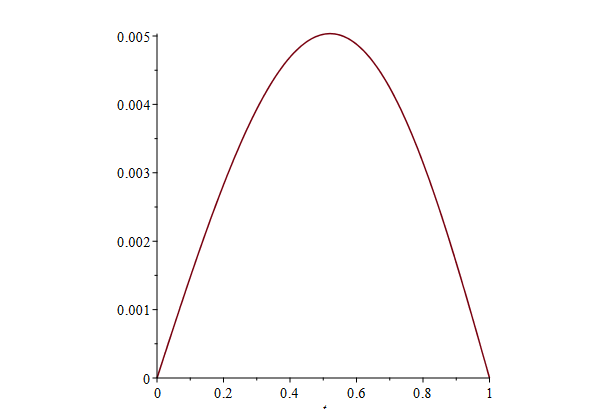

# Иницилизация численного алгоритма с шумом

In [ ]:
%reset -f

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a,b = 0,1
n = 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)
eps = 0.001

## Задание функция с численной правой частью

In [ ]:
def phi(s: float) -> float:
    # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
    return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

def theta(s: float) -> float:
    # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
    return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

def y(x: float,eps: float) -> float:
    return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)


def y_star(t: float) -> float:
    sum = 0
    for i in range(1, n-1):
        if x[i] < t:
            sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i],eps)
            # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
        else:
            # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
            sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i],eps)
    sum *= 2
    sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y(x[0],eps) + \
        theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y(x[n-1],eps)
    return (h/2) * sum

def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

## Основной ход алгоритма

In [ ]:
for i in range(n):
    real_one[i] = np.sin(x[i])
for i in range(n):
    right_side[i] = y_star(t[i])
    
for i in range(n):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])
for i in range(n):
    left_side[i,i] = alpha + h * G_star_ts(t[i],s[i]) * A[i]

## Построение графиков

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Решение на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x,np.linalg.solve(left_side,right_side),label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Численное решение на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x,np.linalg.solve(left_side,right_side),label = 'численное решение',color = 'red')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Точное решение на сетке размером:{n}')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(x,right_side)

# Анализ коэфициента альфа

In [ ]:
%reset -f

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a,b = 0,1
n = 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 0.00062815
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)
np.random.seed(42)
R = 0.5221835340
eps = 0.001

In [ ]:
def phi(s: float) -> float:
    # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
    return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

def theta(s: float) -> float:
    # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
    return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

def y(x: float,eps: float) -> float:
    return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)


def y_star(t: float) -> float:
    sum = 0
    for i in range(1, n-1):
        if x[i] < t:
            sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i],eps)
            # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
        else:
            # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
            sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i],eps)
    sum *= 2
    sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y(x[0],eps) + \
        theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y(x[n-1],eps)
    return (h/2) * sum

def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))
    
def norma_L2(f: np.ndarray):
    sum = 0
    for i in range(1, n-1):
        sum += (np.abs(f[i]) ** 2)
    sum *= 2
    sum += (np.abs(f[0]) ** 2) + (np.abs(f[n-1]) ** 2)
    return np.sqrt((h/2) * sum)

In [ ]:
for i in range(n):
    real_one[i] = np.sin(x[i])
for i in range(n):
    right_side[i] = y_star(t[i])
    
for i in range(n):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])
for i in range(n):
    left_side[i,i] = alpha + h * G_star_ts(t[i],s[i]) * A[i]

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Решение на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x,np.linalg.solve(left_side,right_side),label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [ ]:
plt.figure(figsize=(8, 6))
plt.title(f'Численное решение на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x,np.linalg.solve(left_side,right_side),label = 'численное решение',color = 'red')
plt.grid(True)
plt.legend()

In [ ]:
norma_L2(np.linalg.solve(left_side,right_side) - R)

## функция для алгоритма

In [99]:
def test(alpha: float):
    a,b = 0,1
    n = 100
    t = np.linspace(a,b,n)
    s = np.linspace(a,b,n)
    x = np.linspace(a,b,n)
    right_side = np.full(n,np.NAN)
    left_side = np.full((n,n),np.NAN)
    real_one = np.full(n,np.NAN)
    A = np.ones(n)
    A[0],A[n - 1] = 0.5,0.5
    h = (b - a) / (n - 1)
    np.random.seed(42)
    R = 0.5221835340
    eps = 0.001
    def phi(s: float) -> float:
    # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
        return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

    def theta(s: float) -> float:
        # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
        return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

    def y(x: float,eps: float) -> float:
        return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)


    def y_star(t: float) -> float:
        sum = 0
        for i in range(1, n-1):
            if x[i] < t:
                sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i],eps)
                # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
            else:
                # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
                sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i],eps)
        sum *= 2
        sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y(x[0],eps) + \
            theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y(x[n-1],eps)
        return (h/2) * sum

    def G_star_ts(t: float,s: float):
        if s > t:
            return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
        else:
            return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))
        
    def norma_L2(f: np.ndarray):
        sum = 0
        for i in range(1, n-1):
            sum += (np.abs(f[i]) ** 2)
        sum *= 2
        sum += (np.abs(f[0]) ** 2) + (np.abs(f[n-1]) ** 2)
        return np.sqrt((h/2) * sum)
    for i in range(n):
        real_one[i] = np.sin(x[i])
    for i in range(n):
        right_side[i] = y_star(t[i])
    
    for i in range(n):
        for j in range(n):
            left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])
    for i in range(n):
        left_side[i,i] = alpha + h * G_star_ts(t[i],s[i]) * A[i]
    return np.abs(norma_L2(np.linalg.solve(left_side,right_side) - R))

In [100]:
from scipy.optimize import minimize
import numpy as np
res = minimize(test, 0.00077535, method='nelder-mead', options={'xatol': 1e-5, 'disp': True})

# Вывод результатов
print(res.x)

Optimization terminated successfully.
         Current function value: 0.245677
         Iterations: 6
         Function evaluations: 12
[0.00062997]


In [ ]:
0.00077535
0.00062997

In [104]:
from scipy.optimize import rosen, basinhopping

minimizer_kwargs = {"method": "BFGS"}
temperature = 1
stepsize = 250

# Запускаем алгоритм
res = basinhopping(test, 0.00062997, minimizer_kwargs=minimizer_kwargs, T=temperature, stepsize=stepsize,niter=20)
print(res.x)

[0.00062617]


In [103]:
test(0.00062617)

0.245676251932548